In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("C:\\PythonProjects\\PBL2\\cicids2017_cleaned.csv")

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


Attack Type
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64


C:\Users\ishaa\AppData\Local\Temp\ipykernel_5372\956607838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


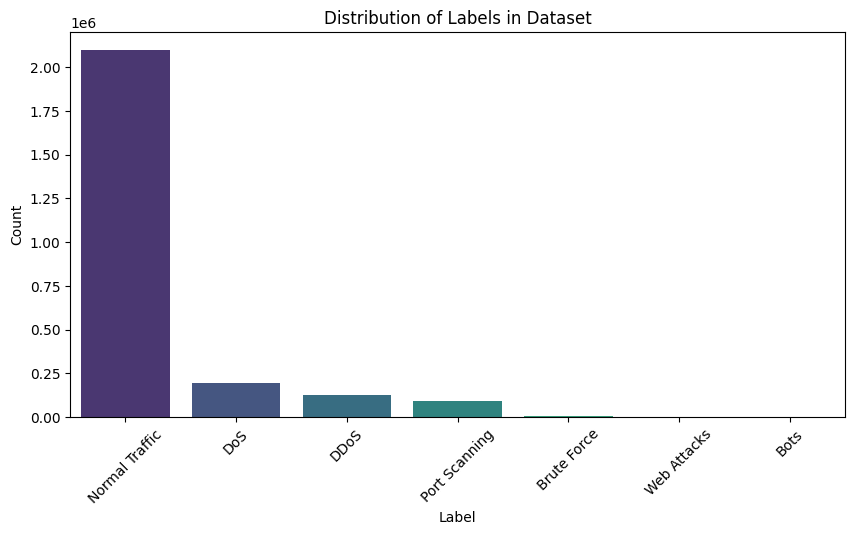

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique labels
label_counts = df['Attack Type'].value_counts()

print(label_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Dataset")
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
plt.show()

In [5]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load Data
df = pd.read_csv("C:\\PythonProjects\\PBL2\\cicids2017_cleaned.csv")

# ✅ Step 1: Count Classes
class_counts = df['Attack Type'].value_counts()
print("Original Class Distribution:\n", class_counts)

# ✅ Step 2: Downsample "Normal Traffic"
df_normal = df[df['Attack Type'] == 'Normal Traffic'].sample(n=250000, random_state=42)  # Change 500K if needed

# ✅ Step 3: Keep other classes AS-IS (Except for upsampling later)
df_other = df[df['Attack Type'] != 'Normal Traffic']

# ✅ Step 4: Upsample Minority Classes using SMOTE
X = df_other.drop(columns=['Attack Type'])
y = df_other['Attack Type']

smote = SMOTE(sampling_strategy={
    'Brute Force': 100000, 
    'Web Attacks': 100000, 
    'Bots': 100000
}, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Step 5: Combine Everything
df_balanced = pd.concat([
    df_normal, 
    pd.DataFrame(X_resampled, columns=X.columns).assign(**{'Attack Type': y_resampled})
])

# ✅ Step 6: Shuffle Data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# ✅ Step 7: Save Processed Data
df_balanced.to_csv("C:\\PythonProjects\\PBL2\\cicids2017_balanced.csv", index=False)

print("✅ Data Preprocessing Done!")
print("New Class Distribution:\n", df_balanced['Attack Type'].value_counts())

Original Class Distribution:
 Attack Type
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64
✅ Data Preprocessing Done!
New Class Distribution:
 Attack Type
Normal Traffic    250000
DoS               193745
DDoS              128014
Bots              100000
Web Attacks       100000
Brute Force       100000
Port Scanning      90694
Name: count, dtype: int64


Attack Type
Normal Traffic    250000
DoS               193745
DDoS              128014
Bots              100000
Web Attacks       100000
Brute Force       100000
Port Scanning      90694
Name: count, dtype: int64


C:\Users\ishaa\AppData\Local\Temp\ipykernel_5372\113975614.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


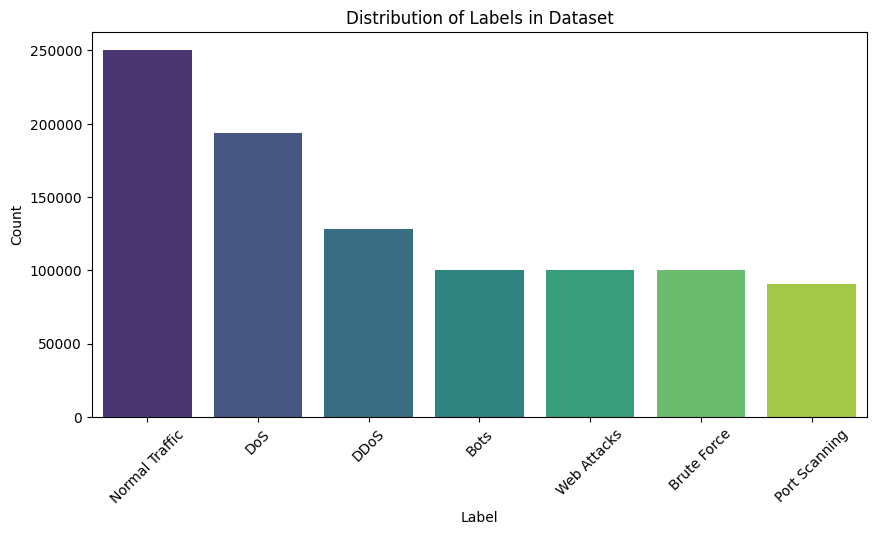

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique labels
label_counts = df_balanced['Attack Type'].value_counts()

print(label_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Dataset")
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
plt.show()

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, SeparableConv1D, MaxPooling1D, BatchNormalization, Flatten
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, GaussianNoise
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# ✅ Separate Features & Labels
X = df_balanced.drop(columns=['Attack Type']).values  
y = df_balanced['Attack Type'].values  

# ✅ Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# ✅ Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ✅ Add Noise to Prevent Overfitting
# X += np.random.normal(0, 0.05, X.shape)  # ✅ Reduce Noise a Bit (0.05)

# ✅ Reshape for CNN
X = np.expand_dims(X, axis=2)  # Shape -> (samples, features, 1)

# ✅ Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# ✅ CNN + BiLSTM Model (Balanced & Faster)
model = Sequential([
    # ✅ Gaussian Noise for Robustness
    # GaussianNoise(0.05, input_shape=(X.shape[1], 1)),

    # ✅ CNN Feature Extractor
    SeparableConv1D(filters=64, kernel_size=3, activation='relu', padding='same', strides=2, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, strides=2),

    SeparableConv1D(filters=128, kernel_size=3, activation='relu', padding='same', strides=2, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, strides=2),

    # ✅ Smaller BiLSTM (Avoid Overfitting)
    Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(1e-4))),  
    Dropout(0.4),  

    # ✅ Dense Layers
    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.4),  

    # ✅ Output Layer
    Dense(len(np.unique(y)), activation='softmax')
])

# ✅ Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Train Model
history = model.fit(
    X_train, y_train, 
    epochs=10, batch_size=128,  # ✅ Larger Batch Size (Faster Training)
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  
    verbose=1
)

# ✅ Evaluate on Validation Set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
val_acc = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# ✅ Print Results
print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')


Epoch 1/10
6768/6768 [==============================] - 62s 9ms/step - loss: 0.1615 - accuracy: 0.9577 - val_loss: 0.0903 - val_accuracy: 0.9761
Epoch 2/10
6768/6768 [==============================] - 59s 9ms/step - loss: 0.0975 - accuracy: 0.9753 - val_loss: 0.0783 - val_accuracy: 0.9801
Epoch 3/10
6768/6768 [==============================] - 58s 9ms/step - loss: 0.0849 - accuracy: 0.9790 - val_loss: 0.0867 - val_accuracy: 0.9756
Epoch 4/10
6768/6768 [==============================] - 59s 9ms/step - loss: 0.0786 - accuracy: 0.9805 - val_loss: 0.0704 - val_accuracy: 0.9820
Epoch 5/10
6768/6768 [==============================] - 59s 9ms/step - loss: 0.0737 - accuracy: 0.9815 - val_loss: 0.0730 - val_accuracy: 0.9795
Epoch 6/10
6768/6768 [==============================] - 59s 9ms/step - loss: 0.0715 - accuracy: 0.9820 - val_loss: 0.0752 - val_accuracy: 0.9786
Epoch 7/10
3008/3008 [==============================] - 8s 3ms/step
Validation Accuracy: 0.9820
Validation F1 Score: 0.9820


In [12]:
df['Attack Type'].value_counts()

Attack Type
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

# ✅ Preprocess Original Data (Same as Before)
X_original = df.drop(columns=['Attack Type']).values  
y_original = df['Attack Type'].values  

# Encode labels
y_original = label_encoder.transform(y_original)  # Use the same label encoder as before

# Normalize features
X_original = scaler.transform(X_original)  # Use the same scaler as before

# Reshape input for CNN
X_original = np.expand_dims(X_original, axis=2)  # Shape -> (samples, features, 1)

# ✅ Make Predictions
y_original_pred = np.argmax(model.predict(X_original), axis=1)

# ✅ Evaluate Model
orig_acc = accuracy_score(y_original, y_original_pred)
orig_f1 = f1_score(y_original, y_original_pred, average='weighted')

# Print Results
print(f'Original Dataset Accuracy: {orig_acc:.4f}')
print(f'Original Dataset F1 Score: {orig_f1:.4f}')


78774/78774 [==============================] - 199s 3ms/step
Original Dataset Accuracy: 0.9637
Original Dataset F1 Score: 0.9719


In [13]:
model.save("nids_v3.h5");

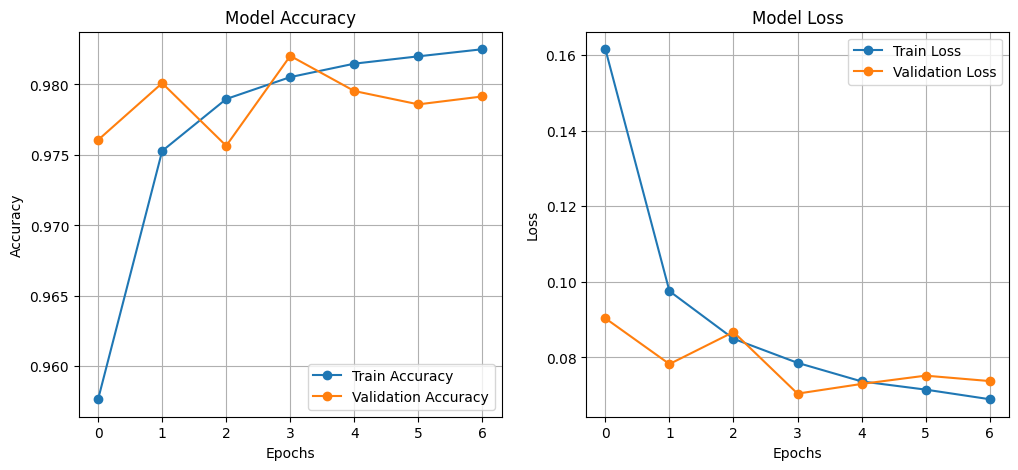

In [14]:
import matplotlib.pyplot as plt

# Extract values from history
history_dict = history.history

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Train Loss', marker='o')
plt.plot(history_dict['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid()

plt.show()


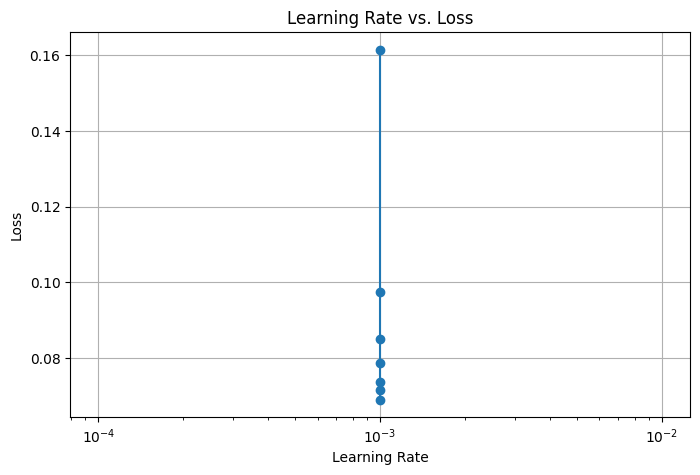

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['lr'] if 'lr' in history.history else [0.001] * len(history.history['loss']), history.history['loss'], marker='o')
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")
plt.grid()
plt.show()

3008/3008 [==============================] - 8s 3ms/step


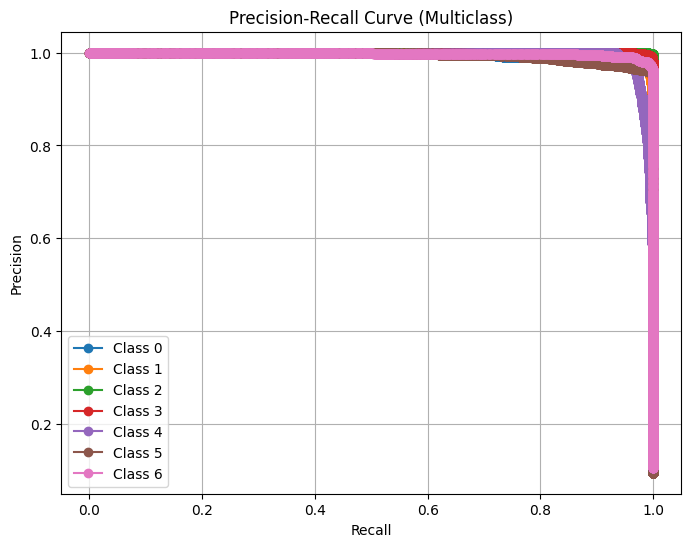

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# ✅ Get prediction probabilities for all classes
y_val_probs = model.predict(X_val)

# ✅ One-vs-Rest (OvR) Precision-Recall Curves
plt.figure(figsize=(8, 6))

for i in range(y_val_probs.shape[1]):  # Loop over each class
    precision, recall, _ = precision_recall_curve(y_val == i, y_val_probs[:, i])
    plt.plot(recall, precision, marker='o', label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Multiclass)")
plt.legend()
plt.grid()
plt.show()


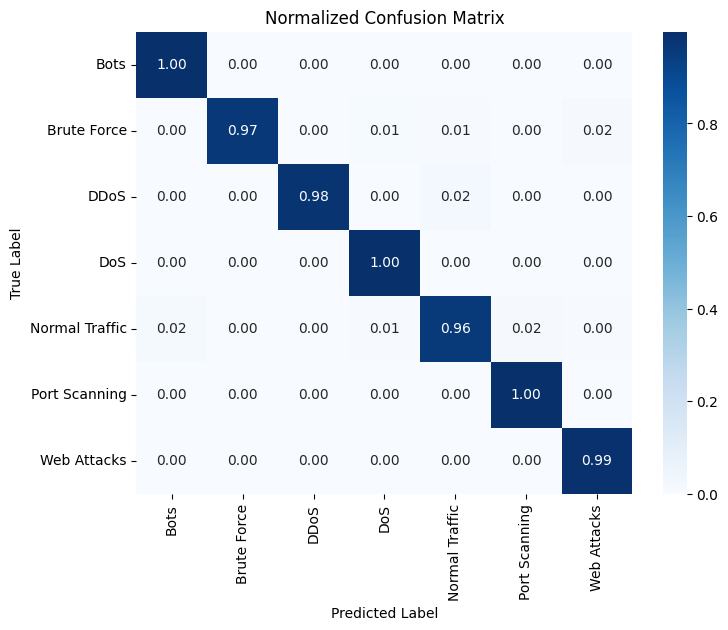

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Compute Confusion Matrix
cm = confusion_matrix(y_original, y_original_pred, normalize='true')

# ✅ Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

78774/78774 [==============================] - 199s 3ms/step


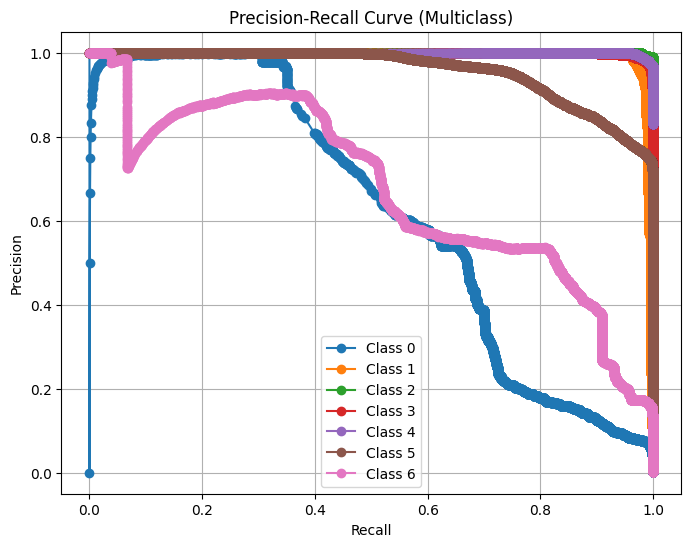

In [19]:
from sklearn.metrics import precision_recall_curve

# ✅ Get Probabilities for Each Class
y_original_probs = model.predict(X_original)

plt.figure(figsize=(8, 6))

for i in range(y_original_probs.shape[1]):  # Loop over each class
    precision, recall, _ = precision_recall_curve(y_original == i, y_original_probs[:, i])
    plt.plot(recall, precision, marker='o', label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Multiclass)")
plt.legend()
plt.grid()
plt.show()

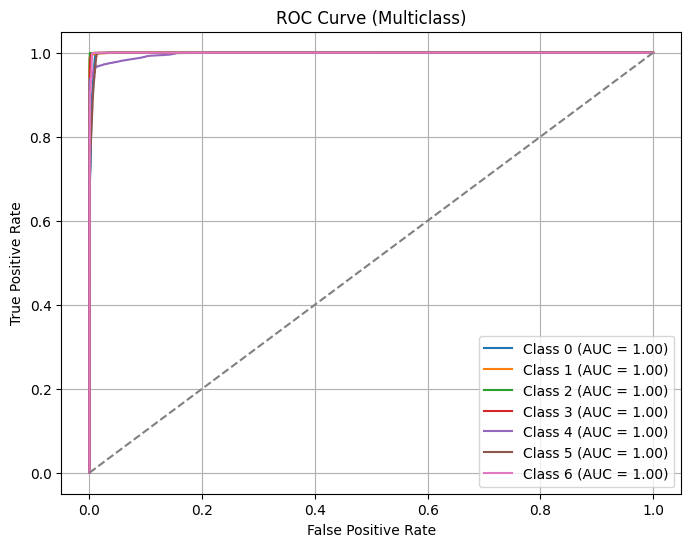

In [20]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for i in range(y_original_probs.shape[1]):
    fpr, tpr, _ = roc_curve(y_original == i, y_original_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass)")
plt.legend()
plt.grid()
plt.show()